
# KZ4020 Lab 2 — IR spectroscopy of HCl (data analysis workbook)

Nothing meaningful will run until you **enter all required values** (data + constants + choices) in the **Inputs** cell.

**Goal:** Use an assigned IR rovibrational spectrum of HCl to extract:
- band origin $\tilde{\omega}_0$
- rotational constants $\tilde{B}_0$ and $\tilde{B}_1$
- vibration–rotation coupling $\alpha_e$
- bond lengths $r_0$ and $r_1$
- anharmonicity constant $x_e$, $\tilde{\omega}_e$
- dissociation energy estimate $D_0$

---

## What you must hand in (in your report)
- Your peak assignment table (P and R branches; include isotopic splitting discussion).
- Fit parameters $a,b,c$ from $y=a+bx+cx^2$, with a plot and a short comment.
- Calculated $\tilde{B}_0, \tilde{B}_1, \alpha_e, r_0, r_1, x_e, \tilde{\omega}_e, D_0$.




## Inputs

Fill in **all** values below before proceeding:
1) Your assigned line positions $(m,\tilde{\nu})$ in $\text{cm}^{-1}$  
2) Isotopologue choice (35 or 37)  
3) Physical constants (SI) and masses (u)  
4) The overtone band origin $\tilde{\omega}_0'$ ($\text{cm}^{-1}$) used for $x_e$  
5) Unit-conversion factors you will use

The notebook will stop with an error until everything is provided.


In [1]:

import numpy as np

# -----------------------------
# 1) Enter your assigned data
# -----------------------------
m_values = [12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12
]

nu_cm1 = [3085.5, 3072.8, 3059.2, 3045, 3030.1 , 3014.3, 2998, 2980.9, 2963.2, 2944.8, 2925.8, 2906.2,
    2865.1, 2843.5, 2821.5, 2798.9, 2775.7, 2752, 2727.7, 2703, 2677.7, 2651.9, 2625.6, 2599
]

# ---------------------------------
# 2) Choose isotopologue to analyze
# ---------------------------------
# Set to "35" or "37"
isotopologue = "35"

# --------------------------------------------
# 3) Physical constants (SI) and masses (u)
# --------------------------------------------
# SI constants
h = 6.62607015e-34          # J*s
c_light = 299792458    # m/s
u = 1.66053906660e-27          # kg

# Avogadro constant
N_A = 6.02214076e23        # 1/mol

# Masses in atomic mass units (u)
m_H_u =     1.00784  # u
m_Cl35_u = 34.96885  # u
m_Cl37_u = 36.96590  # u

# --------------------------------------------
# 4) Overtone band origin used for x_e (cm^-1)
# --------------------------------------------
omega0_prime_cm1 =  5668  # e.g. literature value for H^35Cl 

# --------------------------------------------
# 5) Unit conversions you will use
# --------------------------------------------
# cm^-1 -> m^-1 conversion factor
cm1_to_m1 = 100

# -----------------------------
# Below this line are checks for required inputs
# -----------------------------

def _require(name, value):
    if value is None:
        raise ValueError(f"Missing required input: {name} (currently None). Fill it in above.")
    if isinstance(value, str) and value.strip() == "":
        raise ValueError(f"Missing required input: {name} (currently empty string). Fill it in above.")

# Required: data
_require("m_values", m_values)
_require("nu_cm1", nu_cm1)

if len(m_values) == 0 or len(nu_cm1) == 0:
    raise ValueError("You must enter at least one line (m, nu_cm1).")

if len(m_values) != len(nu_cm1):
    raise ValueError(f"Length mismatch: len(m_values)={len(m_values)} but len(nu_cm1)={len(nu_cm1)}")

m = np.array(m_values, dtype=float)
nu = np.array(nu_cm1, dtype=float)

if np.any(m == 0):
    raise ValueError("m must not include 0. Use ±1, ±2, ... (positive R branch, negative P branch).")

# Required: isotope choice
_require("isotopologue", isotopologue)
if isotopologue not in {"35", "37"}:
    raise ValueError('isotopologue must be set to "35" or "37".')

# Required: constants and masses
for name in ["h", "c_light", "u", "N_A", "m_H_u", "m_Cl35_u", "m_Cl37_u", "omega0_prime_cm1", "cm1_to_m1"]:
    _require(name, globals()[name])

# Basic sanity on conversion factor
if float(cm1_to_m1) <= 0:
    raise ValueError("cm1_to_m1 must be positive.")

print(f"Loaded {len(m)} assigned lines.")
print("m range:", (m.min(), m.max()))
print("nu~ range (cm^-1):", (nu.min(), nu.max()))
print(f"Isotopologue chosen: H^{isotopologue}Cl")


Loaded 24 assigned lines.
m range: (-12.0, 12.0)
nu~ range (cm^-1): (2599.0, 3085.5)
Isotopologue chosen: H^35Cl



## Step 1 — Quadratic fit $y=a+bx+cx^2$

Fit $\tilde{\nu}$ vs $m$ to:
$$
y=a+bx+cx^2
$$
where $x=m$ and $y=\tilde{\nu}$ ($\text{cm}^{-1}$).

Then identify:
- $a = \tilde{\omega}_0$
- $b = (\tilde{B}_1 + \tilde{B}_0)$
- $c = (\tilde{B}_1 - \tilde{B}_0)$


Fit results (y = a + b x + c x^2):
a = 2885.898322  cm^-1   (a = omega0)
b = 20.379769  cm^-1   (b = B1 + B0)
c = -0.303200  cm^-1   (c = B1 - B0)


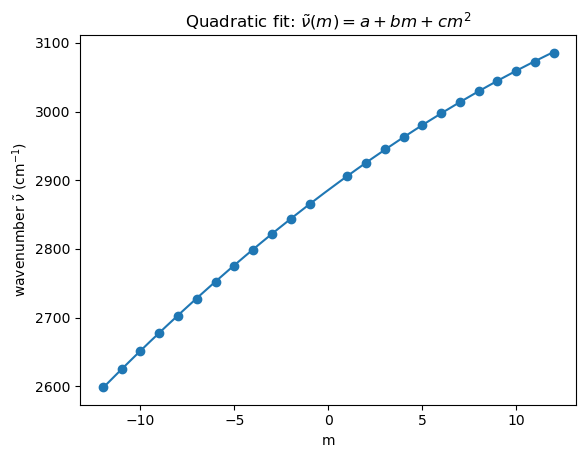

In [4]:

import matplotlib.pyplot as plt

# Fit: numpy returns coefficients in descending order: [c, b, a]
c2, b, a = np.polyfit(m, nu, deg=2)

print("Fit results (y = a + b x + c x^2):")
print(f"a = {a:.6f}  cm^-1   (a = omega0)")
print(f"b = {b:.6f}  cm^-1   (b = B1 + B0)")
print(f"c = {c2:.6f}  cm^-1   (c = B1 - B0)")

# Plot
xfit = np.linspace(m.min(), m.max(), 400)
yfit = a + b*xfit + c2*xfit**2

plt.figure()
plt.scatter(m, nu)
plt.plot(xfit, yfit)
plt.xlabel("m")
plt.ylabel(r"wavenumber $\tilde{\nu}$ (cm$^{-1}$)")
plt.title(r"Quadratic fit: $\tilde{\nu}(m)=a+bm+cm^2$")
plt.show()



## Step 2 — Extract $\tilde{B}_0$, $\tilde{B}_1$, and $\alpha_e$

From $b=\tilde{B}_1+\tilde{B}_0$ and $c=\tilde{B}_1-\tilde{B}_0$:
$$
\tilde{B}_1=\frac{b+c}{2},\qquad \tilde{B}_0=\frac{b-c}{2},\qquad \alpha_e=\tilde{B}_0-\tilde{B}_1(=-c).
$$


In [5]:

B1 = (b + c2) / 2  # compute B1 from b and c2
B0 = (b - c2) / 2 # compute B0 from b and c2
alpha_e = B0 - B1  # compute alpha_e from B0 and B1

if  B0 is None or B1 is None or alpha_e is None:
    raise ValueError("Unexpected: B1, B0 and alpha_e should be not be None. Re-check your peak assignments and fit.")

print(f"B0 = {B0:.6f} cm^-1")
print(f"B1 = {B1:.6f} cm^-1")
print(f"alpha_e = {alpha_e:.6f} cm^-1")



B0 = 10.341485 cm^-1
B1 = 10.038285 cm^-1
alpha_e = 0.303200 cm^-1



## Step 3 — Bond lengths $r_0$ and $r_1$

You will use:
$$
\tilde{B}=\frac{h}{8\pi^2 c I},\qquad I=\mu r^2
$$
which gives:
$$
r=\,?
$$

**Unit warning:** Your fit gives $\tilde{B}$ in $\text{cm}^{-1}$. In SI you must use $\text{m}^{-1}$.
Use your conversion factor `cm1_to_m1` from the Inputs cell.


In [6]:

import math

# Choose chlorine mass based on isotopologue
m_Cl_u = m_Cl35_u if isotopologue == "35" else m_Cl37_u

# Reduced mass (SI)
m_H = float(m_H_u) * float(u)
m_Cl = float(m_Cl_u) * float(u)
mu = (m_H * m_Cl) / (m_H + m_Cl)  # compute reduced mass mu from m_H and m_Cl
if mu is None:
    raise ValueError("Reduced mass mu could not be computed. Check your mass inputs.")

print(f"Reduced mass mu = {mu:.6e} kg")

# --- You must explicitly create SI wavenumber versions ---
B0_m1 = cm1_to_m1 * B0  # convert B0 from cm^-1 to m^-1 using cm1_to_m1
B1_m1 = cm1_to_m1 * B1  # convert B1 from cm^-1 to m^-1 using cm1_to_m1

_require("B0_m1", B0_m1)
_require("B1_m1", B1_m1)

def bond_length_angstrom(B_m1: float, mu_kg: float) -> float:
    """ Calculate bond length in angstroms from rotational constant B (in m^-1) and reduced mass mu (in kg). """
    # r_m = ...
    # return r_m
    r_m = math.sqrt(h / (8 * math.pi**2 * c_light * B_m1 * mu_kg))
    return r_m * 1e10  # convert meters to angstroms

r0_A = bond_length_angstrom(B0_m1, mu)
r1_A = bond_length_angstrom(B1_m1, mu)

print(f"r0 = {r0_A:.6f} Å")
print(f"r1 = {r1_A:.6f} Å")

if not (0.1 < r0_A < 10 and 0.1 < r1_A < 10):
    raise ValueError("Bond lengths look unrealistic. Check isotope choice and unit conversion.")


Reduced mass mu = 1.626675e-27 kg
r0 = 1.289974 Å
r1 = 1.309310 Å



## Step 4 — Anharmonicity constant $x_e$ and $\tilde{\omega}_e$

Use your provided overtone band origin $\tilde{\omega}_0'$ ($\text{cm}^{-1}$) from the Inputs cell.

With $\tilde{\omega}_0=a$, compute:
$$
x_e=\frac{\tilde{\omega}_0'-2\tilde{\omega}_0}{2\tilde{\omega}_0'-6\tilde{\omega}_0},\qquad
\tilde{\omega}_e=\frac{\tilde{\omega}_0}{1-2x_e}.
$$


In [8]:

omega0 = a  # cm^-1
omega0_prime = float(omega0_prime_cm1)  # cm^-1

x_e = (omega0_prime-2*omega0)/ (2*omega0_prime-6*omega0)  # compute x_e from omega0 and omega0_prime
omega_e_cm1 = omega0 / (1 - 2*x_e)  # compute omega_e from omega0 and x_e

print(f"omega0 (from fit)      = {omega0:.6f} cm^-1")
print(f"omega0' (input)        = {omega0_prime:.6f} cm^-1")
print(f"x_e                    = {x_e:.6f} (dimensionless)")
print(f"omega_e                = {omega_e_cm1:.6f} cm^-1")

if not (x_e > 0):
    raise ValueError("x_e should be positive. Re-check omega0 and the formula.")


omega0 (from fit)      = 2885.898322 cm^-1
omega0' (input)        = 5668.000000 cm^-1
x_e                    = 0.017359 (dimensionless)
omega_e                = 2989.694966 cm^-1



## Step 5 — Dissociation energy estimate $D_0$

Use:
$$
D_{0}=\frac{hc\tilde{\omega}_{e}}{4x_{e}}-\frac{1}{2}hc\tilde{\omega_{e}}\left(1-\frac{1}{2}x_{e}\right).
$$

**Units:** Convert $\tilde{\omega}_e$ from $\text{cm}^{-1}$ to $\text{m}^{-1}$ using your `cm1_to_m1`.


In [9]:

# You must explicitly convert omega_e to SI wavenumber
omega_e_m1 = cm1_to_m1 * omega_e_cm1  # TODO: convert omega_e_cm1 from cm^-1 to m^-1 using cm1_to_m1
_require("omega_e_m1", omega_e_m1)

D0_J = (h * c_light * omega_e_m1) / (4 * x_e) - 0.5 * h * c_light * omega_e_m1 * (1 - 0.5 * x_e)  # compute D0 in J using omega_e_m1 and x_e (and constants h and c_light)
D0_kJmol = (D0_J * float(N_A)) / 1000.0

print(f"D0 = {D0_J:.6e} J (per molecule)")
print(f"D0 = {D0_kJmol:.3f} kJ/mol")


D0 = 8.258609e-19 J (per molecule)
D0 = 497.345 kJ/mol
